### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy.stats as st

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format='{:06f}'.format

from warnings import filterwarnings
filterwarnings('ignore')

### Data Understanding

In [29]:
#For all the continent the all the factors dataset

In [3]:
af = pd.read_csv('C:/Users/HP/Downloads/Africa_Data.csv')
af.head()   

,Unnamed: 0,AdjustedsavingsnaturalresourcesdepletionpctofGNI,AdjustedsavingsnetforestdepletionpctofGNI,Agriculturallandpctoflandarea,AgricultureforestryandfishingvalueaddedpctofGDP,CO2emissionsmetrictonspercapita,GDPgrowthannualpct,MethaneemissionsmetrictonsofCO2equivalentpercapita,NitrousoxideemissionsmetrictonsofCO2equivalentpercapita,Populationdensitypeoplepersqkmoflandarea,AnnualCO2emissions,ShareofglobalCO2emissions,Consumptionbasedtonnes,Productionbasedtonnes,Cementtonnes,Flaringtonnes,Oiltonnes,Coaltonnes,Gastonnes,Shareofpopulationlivinginextremepovertypct,GDPpercapitainternationalUSDconstant2011internationalUSD,Emissionintensitykgper2011PPPUSDofGDP,MeanTemp,MeanRain,Time,CountryCode,CountryName,Continent,Continentcode
0,1,4.095772,0.000000,45.857063,16.819709,0.082204,6.549933,1.134637,0.511616,4.436891,453711.970000,0.004800,0,453711.970000,76940.000000,0.000000,313970.000000,62794.000000,0.000000,0.000000,0.000000,0.000000,21.127200,100.491245,1961,AGO,Angola,Africa,AF
1,2,6.903328,12.569952,61.331776,37.902952,0.051697,-13.746135,0.262873,0.223814,111.076246,47736.690000,0.000500,0,47736.690000,0.000000,0.000000,45224.000000,2512.500000,0.000000,0.000000,0.000000,0.000000,20.197458,109.540114,1961,BDI,Burundi,Africa,AF
2,3,5.037928,0.000000,12.788223,46.193786,0.052049,3.141280,0.793811,1.012102,21.868278,128240.000000,0.001400,0,128240.000000,0.000000,0.000000,128240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.081625,82.294439,1961,BEN,Benin,Africa,AF
3,4,0.096497,0.000000,29.747807,38.307008,0.018730,4.043928,0.752138,0.768025,17.889547,91600.000000,0.001000,0,91600.000000,0.000000,0.000000,91600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.615625,69.404331,1961,BFA,Burkina Faso,Africa,AF
4,5,6.131611,0.222591,7.605381,37.952426,0.057670,4.953554,1.461435,0.988699,2.449623,87936.000000,0.000900,0,87936.000000,0.000000,0.000000,87936.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.991592,113.696908,1961,CAF,Central African Republic,Africa,AF


In [4]:
ai = pd.read_csv('C:/Users/HP/Downloads/Asia_Data.csv')
ai.head()

,Unnamed: 0,AdjustedsavingsnaturalresourcesdepletionpctofGNI,AdjustedsavingsnetforestdepletionpctofGNI,Agriculturallandpctoflandarea,AgricultureforestryandfishingvalueaddedpctofGDP,CO2emissionsmetrictonspercapita,Electricityproductionfromcoalsourcespctoftotal,Energyimportsnetpctofenergyuse,Energyusekgofoilequivalentpercapita,Fossilfuelenergyconsumptionpctoftotal,GDPgrowthannualpct,MethaneemissionsmetrictonsofCO2equivalentpercapita,NitrousoxideemissionsmetrictonsofCO2equivalentpercapita,Populationdensitypeoplepersqkmoflandarea,AnnualCO2emissions,ShareofglobalCO2emissions,Consumptionbasedtonnes,Productionbasedtonnes,Cementtonnes,Flaringtonnes,Oiltonnes,Coaltonnes,Gastonnes,PercapitaenergyusekWh,Shareofpopulationlivinginextremepovertypct,GDPpercapitainternationalUSDconstant2011internationalUSD,Emissionintensitykgper2011PPPUSDofGDP,MeanTemp,MeanRain,Time,CountryCode,CountryName,Continent,Continentcode
0,1,14.988529,0.827532,57.745918,26.729670,0.053589,0.000000,100.000000,281.771718,61.952267,8.137448,1.247441,0.646881,14.044987,490797.700000,0.005200,0,490797.700000,21806.000000,0.000000,293120.000000,175870.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.968494,28.293619,1961,AFG,Afghanistan,Asia,AS
1,2,14.359859,1.509706,2.928752,22.929527,0.109141,18.871147,-499.196572,2213.759327,61.773290,4.412573,3.811538,0.700569,1.419262,10992.000000,0.000100,0,10992.000000,0.000000,0.000000,10992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.768617,4.872225,1961,ARE,United Arab Emirates,Asia,AS
2,3,10.321161,0.728357,75.810053,32.909950,0.226812,0.000000,-363.066418,274.359698,45.479451,-3.755069,0.624707,0.217436,68.194310,2571441.540000,0.027200,0,2571441.540000,105820.000000,0.000000,5096300.000000,1095600.000000,1133900.000000,0.000000,0.000000,0.000000,0.000000,7.844107,28.217125,1961,ARM,Armenia,Asia,AS
3,4,5.610840,0.001555,60.941342,24.611552,2.615422,0.000000,-0.373318,322.736917,93.945021,8.619266,0.825166,0.151258,48.431474,24828176.700000,0.262700,0,24828176.700000,213600.000000,0.000000,14621300.000000,512410.000000,5889100.000000,0.000000,0.000000,0.000000,0.000000,12.452432,27.141233,1961,AZE,Azerbaijan,Asia,AS
4,5,0.422336,0.000000,72.827841,57.988236,0.319261,2.389937,98.713742,276.504731,46.728028,6.058161,1.498686,1.091323,379.218276,2290409.290000,0.024200,0,2290409.290000,5132.500000,0.000000,1411300.000000,714530.000000,159450.000000,0.000000,0.000000,0.000000,0.000000,24.978267,207.773552,1961,BGD,Bangladesh,Asia,AS


In [5]:
eu = pd.read_csv('C:/Users/HP/Downloads/Europe_Data.csv')
eu.head()

,Unnamed: 0,Agriculturallandpctoflandarea,CO2emissionsmetrictonspercapita,Electricityproductionfromcoalsourcespctoftotal,Energyimportsnetpctofenergyuse,Energyusekgofoilequivalentpercapita,Fossilfuelenergyconsumptionpctoftotal,GDPgrowthannualpct,MethaneemissionsmetrictonsofCO2equivalentpercapita,NitrousoxideemissionsmetrictonsofCO2equivalentpercapita,Populationdensitypeoplepersqkmoflandarea,AnnualCO2emissions,ShareofglobalCO2emissions,Consumptionbasedtonnes,Productionbasedtonnes,Cementtonnes,Flaringtonnes,Oiltonnes,Coaltonnes,Gastonnes,PercapitaenergyusekWh,Shareofpopulationlivinginextremepovertypct,GDPpercapitainternationalUSDconstant2011internationalUSD,Emissionintensitykgper2011PPPUSDofGDP,MeanTemp,MeanRain,Time,CountryCode,CountryName,Continent,Continentcode
0,1,44.963504,1.374186,0.000000,30.317657,1046.211640,63.946095,3.406670,0.666141,0.500622,60.576642,2279008.000000,0.024100,0,2279008.000000,58530.000000,0.000000,1814400.000000,321910.000000,84137.000000,0.000000,0.000000,0.000000,0.000000,11.949795,71.719845,1961,ALB,Albania,Europe,EU
1,2,43.054007,4.496362,17.375974,35.327554,1554.034906,86.609414,5.537979,1.673924,1.194030,85.811322,31824045.040000,0.336700,0,31824045.040000,1522800.000000,0.000000,9552000.000000,17660500.000000,3088800.000000,0.000000,0.000000,0.000000,0.000000,6.887542,90.299983,1961,AUT,Austria,Europe,EU
2,3,70.838672,10.103872,83.267827,43.144162,2570.815623,99.962333,4.978423,2.203218,1.309592,38.323346,92698293.810000,0.980700,0,92698293.810000,2351400.000000,0.000000,23288400.000000,66988900.000000,69616.000000,0.000000,0.000000,0.000000,0.000000,10.188343,80.996925,1961,BEL,Belgium,Europe,EU
3,4,51.279038,3.269920,67.165891,49.170399,1675.875145,90.892895,3.365389,0.836166,0.576788,71.798951,25945039.610000,0.274500,0,25945039.610000,864960.000000,0.000000,3649300.000000,21430700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.977959,50.501317,1961,BGR,Bulgaria,Europe,EU
4,5,59.206294,8.253547,18.868623,26.538478,2756.218907,90.931782,0.040011,1.901003,1.067513,64.230527,5515383.170000,0.058400,0,5515383.170000,26629.000000,0.000000,227980.000000,5230700.000000,15778.000000,0.000000,0.000000,0.000000,0.000000,10.260323,78.583475,1961,BIH,Bosnia and Herzegovina,Europe,EU


In [6]:
na = pd.read_csv('C:/Users/HP/Downloads/NorthAmerica_Data.csv')
na.head()

,Unnamed: 0,AdjustedsavingsnaturalresourcesdepletionpctofGNI,AdjustedsavingsnetforestdepletionpctofGNI,Agriculturallandpctoflandarea,AgricultureforestryandfishingvalueaddedpctofGDP,CO2emissionsmetrictonspercapita,GDPgrowthannualpct,MethaneemissionsmetrictonsofCO2equivalentpercapita,NitrousoxideemissionsmetrictonsofCO2equivalentpercapita,Populationdensitypeoplepersqkmoflandarea,AnnualCO2emissions,ShareofglobalCO2emissions,Consumptionbasedtonnes,Productionbasedtonnes,Cementtonnes,Flaringtonnes,Oiltonnes,Coaltonnes,Gastonnes,Shareofpopulationlivinginextremepovertypct,GDPpercapitainternationalUSDconstant2011internationalUSD,Emissionintensitykgper2011PPPUSDofGDP,MeanTemp,MeanRain,Time,CountryCode,CountryName,Continent,Continentcode
0,1,0.116105,0.727271,22.727273,11.065974,0.866730,10.535746,0.711607,1.241799,125.002273,47632.000000,0.000500,0,47632.000000,0.000000,0.000000,47632.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.231567,189.537650,1961,ATG,Antigua and Barbuda,NorthAmerica,000nan
1,2,2.286999,0.525512,3.463393,28.733764,0.387211,4.892277,0.497525,0.412203,4.151819,36640.000000,0.000400,0,36640.000000,0.000000,0.000000,36640.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.974825,200.036617,1961,BLZ,Belize,NorthAmerica,000nan
2,3,0.000000,0.000000,44.186047,24.150724,0.838739,2.590967,0.260433,0.223076,538.879070,194192.000000,0.002100,0,194192.000000,0.000000,0.000000,183400.000000,3596.100000,7192.300000,0.000000,0.000000,0.000000,25.964033,158.030792,1961,BRB,Barbados,NorthAmerica,000nan
3,4,0.087217,0.000000,7.678553,23.019051,10.627898,3.163292,1.222396,1.802048,2.009235,194000693.600000,2.052500,0,194000693.600000,2783900.000000,3993800.000000,118662300.000000,45594800.000000,22966000.000000,0.000000,0.000000,0.000000,-7.390573,36.041608,1961,CAN,Canada,NorthAmerica,000nan
4,5,2.077448,1.055101,27.320799,25.866242,0.355766,1.879277,0.616279,0.371776,27.050196,490976.000000,0.005200,0,490976.000000,0.000000,0.000000,490980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.407200,240.486742,1961,CRI,Costa Rica,NorthAmerica,000nan


In [7]:
oc = pd.read_csv('C:/Users/HP/Downloads/Oceania_Data.csv')
oc.head()

,Unnamed: 0,AdjustedsavingsnetforestdepletionpctofGNI,Agriculturallandpctoflandarea,AgricultureforestryandfishingvalueaddedpctofGDP,CO2emissionsmetrictonspercapita,GDPgrowthannualpct,MethaneemissionsmetrictonsofCO2equivalentpercapita,NitrousoxideemissionsmetrictonsofCO2equivalentpercapita,Populationdensitypeoplepersqkmoflandarea,AnnualCO2emissions,ShareofglobalCO2emissions,Consumptionbasedtonnes,Productionbasedtonnes,Cementtonnes,Flaringtonnes,Oiltonnes,Coaltonnes,Gastonnes,Shareofpopulationlivinginextremepovertypct,GDPpercapitainternationalUSDconstant2011internationalUSD,Emissionintensitykgper2011PPPUSDofGDP,MeanTemp,MeanRain,Time,CountryCode,CountryName,Continent,Continentcode
0,1,0.000000,60.084220,3.503360,8.641569,2.485789,4.874618,0.216196,1.364565,90503896.510000,0.957500,0,90503896.510000,1413800.000000,0.000000,29115300.000000,59974800.000000,0.000000,0.000000,0.000000,0.000000,21.639133,29.294578,1961,AUS,Australia,Oceania,OC
1,2,0.000000,12.424740,26.321033,0.414199,3.517582,0.591115,0.229402,22.290586,168544.000000,0.001800,0,168544.000000,0.000000,0.000000,164800.000000,3745.400000,0.000000,0.000000,0.000000,0.000000,24.498267,248.184717,1961,FJI,Fiji,Oceania,OC
2,3,0.108434,48.148148,20.602174,0.173672,0.949278,0.073203,0.208561,52.134568,7328.000000,0.000100,0,7328.000000,0.000000,0.000000,7328.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.505742,82.583758,1961,KIR,Kiribati,Oceania,OC
3,4,0.000000,59.917967,26.365720,4.863166,-2.700267,6.473449,0.206541,9.189548,11755131.280000,0.124400,0,11755131.280000,323450.000000,0.000000,4997700.000000,6434000.000000,0.000000,0.000000,0.000000,0.000000,9.737622,140.880758,1961,NZL,New Zealand,Oceania,OC
4,5,2.434520,60.461190,32.380435,5.108767,6.978534,0.154155,0.001465,280.127778,51296.000000,0.000500,0,51296.000000,1413800.000000,0.000000,29115300.000000,59974800.000000,0.000000,0.000000,0.000000,0.000000,27.337933,301.246500,1961,PLW,Palau,Oceania,OC


In [8]:
sm = pd.read_csv('C:/Users/HP/Downloads/SouthAmerica_Data.csv')
sm.head()

,Unnamed: 0,AdjustedsavingsnaturalresourcesdepletionpctofGNI,AdjustedsavingsnetforestdepletionpctofGNI,Agriculturallandpctoflandarea,AgricultureforestryandfishingvalueaddedpctofGDP,CO2emissionsmetrictonspercapita,Electricityproductionfromcoalsourcespctoftotal,Energyimportsnetpctofenergyuse,Energyusekgofoilequivalentpercapita,Fossilfuelenergyconsumptionpctoftotal,GDPgrowthannualpct,MethaneemissionsmetrictonsofCO2equivalentpercapita,NitrousoxideemissionsmetrictonsofCO2equivalentpercapita,Populationdensitypeoplepersqkmoflandarea,AnnualCO2emissions,ShareofglobalCO2emissions,Consumptionbasedtonnes,Productionbasedtonnes,Cementtonnes,Flaringtonnes,Oiltonnes,Coaltonnes,Gastonnes,PercapitaenergyusekWh,Shareofpopulationlivinginextremepovertypct,GDPpercapitainternationalUSDconstant2011internationalUSD,Emissionintensitykgper2011PPPUSDofGDP,MeanTemp,MeanRain,Time,CountryCode,CountryName,Continent,Continentcode
0,1,0.136108,0.000000,50.363395,5.665312,2.458551,3.639915,12.688578,1083.403978,70.355202,5.427843,5.789989,2.875413,7.606731,51126710.220000,0.540900,0,51126710.220000,1435500.000000,0.000000,42121300.000000,3539400.000000,4030400.000000,0.000000,0.000000,0.000000,0.000000,14.377203,48.121892,1961,ARG,Argentina,SouthAmerica,SA
1,2,3.226861,1.321218,27.731930,43.794668,0.279281,9.893372,49.245382,222.761658,30.105519,2.089296,2.111082,2.641470,3.442227,1040397.700000,0.011000,0,1040397.700000,21806.000000,0.000000,930660.000000,3664.000000,84272.000000,0.000000,0.000000,0.000000,0.000000,21.317333,83.305607,1961,BOL,Bolivia,SouthAmerica,SA
2,3,0.507724,0.490211,18.010108,17.095344,0.662130,1.300749,-126.309987,423.970018,66.998220,10.275912,2.712610,2.036185,8.890895,49144504.100000,0.519900,0,49144504.100000,2329700.000000,549640.000000,41472200.000000,4679300.000000,113590.000000,0.000000,0.000000,0.000000,0.000000,25.198917,136.977067,1961,BRA,Brazil,SouthAmerica,SA
3,4,2.012520,0.000000,18.003259,10.102275,1.743013,10.292219,14.938435,667.103836,74.345581,5.245272,1.244648,0.394149,11.168061,14458242.090000,0.153000,0,14458242.090000,436110.000000,2260700.000000,7218100.000000,4440800.000000,102590.000000,0.000000,0.000000,0.000000,0.000000,8.058014,53.637575,1961,CHL,Chile,SouthAmerica,SA
4,5,3.919549,0.869912,36.025237,12.999993,1.099581,0.000000,-171.152002,622.066341,58.949690,5.089217,2.324673,0.602283,14.932682,18196303.650000,0.192500,0,18196303.650000,788640.000000,307780.000000,9196600.000000,7192400.000000,710820.000000,0.000000,0.000000,0.000000,0.000000,24.596642,209.873317,1961,COL,Colombia,SouthAmerica,SA


In [9]:
af.shape, ai.shape, eu.shape, na.shape, oc.shape, sm.shape

((2798, 29), (2305, 34), (2333, 31), (1212, 29), (636, 28), (672, 34))

In [30]:
af.shape[0]+ai.shape[0]+eu.shape[0]+na.shape[0]+oc.shape[0]+sm.shape[0]

9956

#### THE three Mother dataset having data for all the continent.

In [12]:
esg = pd.read_excel('C:/Users/HP/Downloads/Environment_Social_and_Governance.xlsx')
esg.head()

,Time,Time Code,Country Name,Country Code,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],Access to electricity (% of population) [EG.ELC.ACCS.ZS],Adjusted savings: natural resources depletion (% of GNI) [NY.ADJ.DRES.GN.ZS],Adjusted savings: net forest depletion (% of GNI) [NY.ADJ.DFOR.GN.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],"Agriculture, forestry, and fishing, value added (% of GDP) [NV.AGR.TOTL.ZS]","Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]","Annualized average growth rate in per capita real survey mean consumption or income, total population (%) [SI.SPR.PCAP.ZG]","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total) [SH.DTH.COMM.ZS]","Children in employment, total (% of children ages 7-14) [SL.TLF.0714.ZS]",CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Control of Corruption: Estimate [CC.EST],Cooling Degree Days (projected change in number of degree Celsius) [EN.CLC.CDDY.XD],"Droughts, floods, extreme temperatures (% of population, average 1990-2009) [EN.CLC.MDAT.ZS]",Ease of doing business index (1=most business-friendly regulations) [IC.BUS.EASE.XQ],Electricity production from coal sources (% of total) [EG.ELC.COAL.ZS],"Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]",Energy intensity level of primary energy (MJ/$2011 PPP GDP) [EG.EGY.PRIM.PP.KD],Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE],"Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]",Food production index (2004-2006 = 100) [AG.PRD.FOOD.XD],Forest area (% of land area) [AG.LND.FRST.ZS],Fossil fuel energy consumption (% of total) [EG.USE.COMM.FO.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],GHG net emissions/removals by LUCF (Mt of CO2 equivalent) [EN.CLC.GHGR.MT.CE],GINI index (World Bank estimate) [SI.POV.GINI],Government Effectiveness: Estimate [GE.EST],"Government expenditure on education, total (% of government expenditure) [SE.XPD.TOTL.GB.ZS]",Health Index 35 (projected change in days) [EN.CLC.HEAT.XD],"Hospital beds (per 1,000 people) [SH.MED.BEDS.ZS]",Income share held by lowest 20% [SI.DST.FRST.20],Individuals using the Internet (% of population) [IT.NET.USER.ZS],"Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate) [SL.TLF.ACTI.ZS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]","Mammal species, threatened [EN.MAM.THRD.NO]","Maximum 5-day Rainfall, 25-year Return Level (projected change in mm) [EN.CLC.PRCP.XD]","Mean Drought Index (projected change, unitless) [EN.CLC.SPEI.XD]",Methane emissions (metric tons of CO2 equivalent per capita) [EN.ATM.METH.PC],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",Net migration [SM.POP.NETM],Nitrous oxide emissions (metric tons of CO2 equivalent per capita) [EN.ATM.NOXE.PC],"Patent applications, residents [IP.PAT.RESD]",People using safely managed drinking water services (% of population) [SH.H2O.SMDW.ZS],People using safely managed sanitation services (% of population) [SH.STA.SMSS.ZS],"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) [EN.ATM.PM25.MC.M3]",Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Population ages 65 and above (% of total population) [SP.POP.65UP.TO.ZS],Population density (people per sq. km of land area) [EN.POP.DNST],Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],Prevalence of overweight (% of adults) [SH.STA.OWAD.ZS],Prevalence of undernourishment (% of population) [SN.ITK.DEFC.ZS],Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Ratio of female to male labor force participation rate (%) (modeled ILO estimate) [SL.TLF.CACT.FM.ZS],Regulatory Quality: Estimate [RQ.EST],Renewable electricity output (% of total electricity output) [EG.ELC.RNEW.ZS],Renewable 

In [13]:
co2 = pd.read_excel('C:/Users/HP/Downloads/Main-Co2.xlsx')
co2.head()

,Country,CountryCode,Continent,Continentcode,Year,concat,AnnualCO2emissions,ShareofglobalCO2emissions,CumulativeCO2emissionsbynation(tonnes),Consumption-based(tonnes),Production-based(tonnes),Cement(tonnes),Flaring(tonnes),Oil(tonnes),Coal(tonnes),Gas(tonnes),Buildings(tonnes),Industry(tonnes),LandUseChange&Forestry(tonnes),Otherfuelcombustion(tonnes),Transport(tonnes),Manufacturing&Construction(tonnes),Fugitiveemissions(tonnes),Electricity&Heat(tonnes),CO2emissionspercapita(tonnespercapita),GDPpercapita(international-$(in2011prices)),Totalpopulation(Gapminder),Percapitaenergyuse(kWh),Shareofpeopleinextremepoverty(%),PercapitaCO2emissions(tonnespercapita),Shareofpopulationlivinginextremepoverty(%),GDPpercapita(international-$)(constant2011international$),Emissionintensity(kgper2011PPP$ofGDP)
0,Afghanistan,AFG,Asia,AS,1949,AFG1949,14656.000000,0.000300,14656,0,14656.000000,0.000000,0.000000,0.000000,14656.000000,0.000000,000nan,000nan,000nan,000nan,000nan,000nan,000nan,000nan,0.001912,0.000000,7663783.000000,000nan,000nan,0.001912,0.000000,000nan,000nan
1,Afghanistan,AFG,Asia,AS,1950,AFG1950,84272.000000,0.001500,98928,0,84272.000000,0.000000,0.000000,65952.000000,21984.000000,0.000000,000nan,000nan,000nan,000nan,000nan,000nan,000nan,000nan,0.010871,2392.000000,7752000.000000,000nan,000nan,0.010871,0.000000,0.000000,0.000000
2,Afghanistan,AFG,Asia,AS,1951,AFG1951,91600.000000,0.001500,190528,0,91600.000000,0.000000,0.000000,65952.000000,25648.000000,0.000000,000nan,000nan,000nan,000nan,000nan,000nan,000nan,000nan,0.011684,2422.000000,7840000.000000,000nan,000nan,0.011684,0.000000,0.000000,0.000000
3,Afghanistan,AFG,Asia,AS,1952,AFG1952,91600.000000,0.001500,282128,0,91600.000000,0.000000,0.000000,62288.000000,32976.000000,0.000000,000nan,000nan,000nan,000nan,000nan,000nan,000nan,000nan,0.011544,2462.000000,7936000.000000,000nan,000nan,0.011544,0.000000,0.000000,0.000000
4,Afghanistan,AFG,Asia,AS,1953,AFG1953,106256.000000,0.001600,388384,0,106256.000000,0.000000,0.000000,65952.000000,36640.000000,0.000000,000nan,000nan,000nan,000nan,000nan,000nan,000nan,000nan,0.013218,2568.000000,8040000.000000,000nan,000nan,0.013218,0.000000,0.000000,0.000000


In [14]:
tmp = pd.read_excel('C:/Users/HP/Downloads/Temperature-Rainfall.xlsx')
tmp.head()

,Year,Statistics,Country,Country Code,Continent,Continent code,RainfallMM,TemperatureCelsius
0,1901,JanAverage,Afghanistan,AFG,Asia,AS,55.744800,-0.037800
1,1901,FebAverage,Afghanistan,AFG,Asia,AS,13.948000,2.423480
2,1901,MarAverage,Afghanistan,AFG,Asia,AS,43.846400,9.362300
3,1901,AprAverage,Afghanistan,AFG,Asia,AS,26.961000,13.556400
4,1901,MayAverage,Afghanistan,AFG,Asia,AS,52.957900,18.150900


In [15]:
esg.shape, co2.shape, tmp.shape

((14579, 71), (18379, 33), (261696, 8))

#### As Asia is the largest and most Populous continent we will take under consideration the asia dataset.

In [16]:
ai.columns

Index(['Unnamed: 0', 'AdjustedsavingsnaturalresourcesdepletionpctofGNI',
       'AdjustedsavingsnetforestdepletionpctofGNI',
       'Agriculturallandpctoflandarea',
       'AgricultureforestryandfishingvalueaddedpctofGDP',
       'CO2emissionsmetrictonspercapita',
       'Electricityproductionfromcoalsourcespctoftotal',
       'Energyimportsnetpctofenergyuse', 'Energyusekgofoilequivalentpercapita',
       'Fossilfuelenergyconsumptionpctoftotal', 'GDPgrowthannualpct',
       'MethaneemissionsmetrictonsofCO2equivalentpercapita',
       'NitrousoxideemissionsmetrictonsofCO2equivalentpercapita',
       'Populationdensitypeoplepersqkmoflandarea', 'AnnualCO2emissions',
       'ShareofglobalCO2emissions', 'Consumptionbasedtonnes',
       'Productionbasedtonnes', 'Cementtonnes', 'Flaringtonnes', 'Oiltonnes',
       'Coaltonnes', 'Gastonnes', 'PercapitaenergyusekWh',
       'Shareofpopulationlivinginextremepovertypct',
       'GDPpercapitainternationalUSDconstant2011internationalUSD',
       'E

In [17]:
cols = ['Unnamed: 0',
        'Adjusted_savings_natural_resources_depletion_pct_of_GNI',
         'Adjusted_savings_net_forest_depletion_pct_of_GNI',
         'Agricultural_land_pct_of_land_area',
         'Agriculture_forestry_and_fishing_value_added_pct_of_GDP',
         'CO2_emissions_metric_tons_per_capita',
         'Electricity_production_from_coal_sources_pct_of_total',
         'Energy_imports_net_pct_of_energy_use', 
         'Energy_use_kg_of_oil_equivalent_per_capita',
         'Fossil_fuel_energy_consumption_pct_of_total',
         'GDP_growth_annual_pct',
         'Methane_emissions_metric_tons_of_CO2_equivalent_per_capita',
         'Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita',
         'Population_density_people_per_sqkm_of_land_area',
         'Annual_CO2_emissions',
         'Share_of_global_CO2_emissions',
         'Consumption_based_tonnes',
         'Production_based_tonnes',
         'Cement_tonnes',
         'Flaring_tonnes',
         'Oil_tonnes',
         'Coal_tonnes',
         'Gas_tonnes',
         'Per_capita_energy_use_kWh',
         'Share_of_population_living_in_extreme_poverty_pct',
         'GDP_per_capita_international_USD_constant_2011_international_USD',
         'Emission_intensity_kg_per_2011_PPP_USD_of_GDP',
         'Mean_Temp',
         'Mean_Rain',
         'Time',
         'Country_Code',
         'Country_Name',
         'Continent',
         'Continent_code']

In [18]:
ai.columns = cols

In [19]:
ai.head()

,Unnamed: 0,Adjusted_savings_natural_resources_depletion_pct_of_GNI,Adjusted_savings_net_forest_depletion_pct_of_GNI,Agricultural_land_pct_of_land_area,Agriculture_forestry_and_fishing_value_added_pct_of_GDP,CO2_emissions_metric_tons_per_capita,Electricity_production_from_coal_sources_pct_of_total,Energy_imports_net_pct_of_energy_use,Energy_use_kg_of_oil_equivalent_per_capita,Fossil_fuel_energy_consumption_pct_of_total,GDP_growth_annual_pct,Methane_emissions_metric_tons_of_CO2_equivalent_per_capita,Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita,Population_density_people_per_sqkm_of_land_area,Annual_CO2_emissions,Share_of_global_CO2_emissions,Consumption_based_tonnes,Production_based_tonnes,Cement_tonnes,Flaring_tonnes,Oil_tonnes,Coal_tonnes,Gas_tonnes,Per_capita_energy_use_kWh,Share_of_population_living_in_extreme_poverty_pct,GDP_per_capita_international_USD_constant_2011_international_USD,Emission_intensity_kg_per_2011_PPP_USD_of_GDP,Mean_Temp,Mean_Rain,Time,Country_Code,Country_Name,Continent,Continent_code
0,1,14.988529,0.827532,57.745918,26.729670,0.053589,0.000000,100.000000,281.771718,61.952267,8.137448,1.247441,0.646881,14.044987,490797.700000,0.005200,0,490797.700000,21806.000000,0.000000,293120.000000,175870.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.968494,28.293619,1961,AFG,Afghanistan,Asia,AS
1,2,14.359859,1.509706,2.928752,22.929527,0.109141,18.871147,-499.196572,2213.759327,61.773290,4.412573,3.811538,0.700569,1.419262,10992.000000,0.000100,0,10992.000000,0.000000,0.000000,10992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.768617,4.872225,1961,ARE,United Arab Emirates,Asia,AS
2,3,10.321161,0.728357,75.810053,32.909950,0.226812,0.000000,-363.066418,274.359698,45.479451,-3.755069,0.624707,0.217436,68.194310,2571441.540000,0.027200,0,2571441.540000,105820.000000,0.000000,5096300.000000,1095600.000000,1133900.000000,0.000000,0.000000,0.000000,0.000000,7.844107,28.217125,1961,ARM,Armenia,Asia,AS
3,4,5.610840,0.001555,60.941342,24.611552,2.615422,0.000000,-0.373318,322.736917,93.945021,8.619266,0.825166,0.151258,48.431474,24828176.700000,0.262700,0,24828176.700000,213600.000000,0.000000,14621300.000000,512410.000000,5889100.000000,0.000000,0.000000,0.000000,0.000000,12.452432,27.141233,1961,AZE,Azerbaijan,Asia,AS
4,5,0.422336,0.000000,72.827841,57.988236,0.319261,2.389937,98.713742,276.504731,46.728028,6.058161,1.498686,1.091323,379.218276,2290409.290000,0.024200,0,2290409.290000,5132.500000,0.000000,1411300.000000,714530.000000,159450.000000,0.000000,0.000000,0.000000,0.000000,24.978267,207.773552,1961,BGD,Bangladesh,Asia,AS


#### Since we had column names all with all words joined, we thus separated each word with a '_' and crated a list of updated columns and replaced it.

### Datatype Check

In [20]:
ai.dtypes

Unnamed: 0                                                            int64
Adjusted_savings_natural_resources_depletion_pct_of_GNI             float64
Adjusted_savings_net_forest_depletion_pct_of_GNI                    float64
Agricultural_land_pct_of_land_area                                  float64
Agriculture_forestry_and_fishing_value_added_pct_of_GDP             float64
CO2_emissions_metric_tons_per_capita                                float64
Electricity_production_from_coal_sources_pct_of_total               float64
Energy_imports_net_pct_of_energy_use                                float64
Energy_use_kg_of_oil_equivalent_per_capita                          float64
Fossil_fuel_energy_consumption_pct_of_total                         float64
GDP_growth_annual_pct                                               float64
Methane_emissions_metric_tons_of_CO2_equivalent_per_capita          float64
Nitrous_oxide_emissions_metric_tons_of_CO2_equivalent_per_capita    float64
Population_d

#### All the features seem fine with the datatypes they are defined with. Thus, there is no need of datatype conversion.

### Five Point Analysis

In [21]:
ai.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2305.000000,1153.000000,665.540507,1.000000,577.000000,1153.000000,1729.000000,2305.000000
Adjusted_savings_natural_resources_depletion_pct_of_GNI,2305.000000,6.718483,9.803872,0.000000,0.480531,2.940594,8.459475,64.657325
Adjusted_savings_net_forest_depletion_pct_of_GNI,2305.000000,0.422077,0.927868,0.000000,0.000000,0.002320,0.335190,11.979650
Agricultural_land_pct_of_land_area,2305.000000,35.018316,24.430197,0.930889,13.228170,29.078323,56.517205,90.555885
Agriculture_forestry_and_fishing_value_added_pct_of_GDP,2305.000000,19.103736,14.754665,0.030928,6.109561,17.806537,29.008471,69.006095
CO2_emissions_metric_tons_per_capita,2305.000000,6.806466,12.276274,0.004333,0.418593,2.369000,7.745176,101.051663
Electricity_production_from_coal_sources_pct_of_total,2305.000000,12.128928,23.463112,0.000000,0.000000,0.000000,12.373191,97.172237
Energy_imports_net_pct_of_energy_use,2305.000000,-235.207023,879.163214,-17632.766113,-211.608957,-0.020871,45.394394,100.000000
Energy_use_kg_of_oil_equivalent_per_capita,2305.000000,2343.549372,3356.802634,58.046185,361.264153,928.811434,2821.996916,22120.371575
Fossil_fuel_energy_consumption_pct_of_total,2305.000000,71.340279,30.748343,0.000000,46.276052,84.919362,98.508905,100.000000


#### As we observe from standard deviations, there are constant features.

### Categorical Data Analysis

In [31]:
ai.select_dtypes(include='O').nunique()

Country_Name    43
dtype: int64

**As we see Contienent, Contienent_code seems to be constant, and Country_code happend to be just a representation of Country name, we can thus go ahead and delete these columns. Furthermore, 'Unnamed: 0' feature is just the serial number which holds no importance in studying our cause.**

In [25]:
ai.drop(['Unnamed: 0', 'Continent','Continent_code', 'Country_Code'], axis=1, inplace=True)

## Null value check

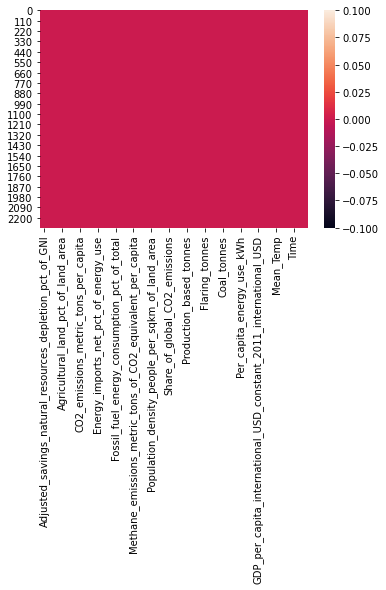

In [27]:
sns.heatmap(ai.isnull())
plt.show()

In [28]:
ai.isnull().any().any()

False

#### From above we got that there is no null value present in the dataset.

### Splitting dataset into numerical and categorical subsets

In [33]:
ai_n = ai.select_dtypes(exclude='O')
ai_c = ai.select_dtypes(include='O')

### Outliers check and treatment

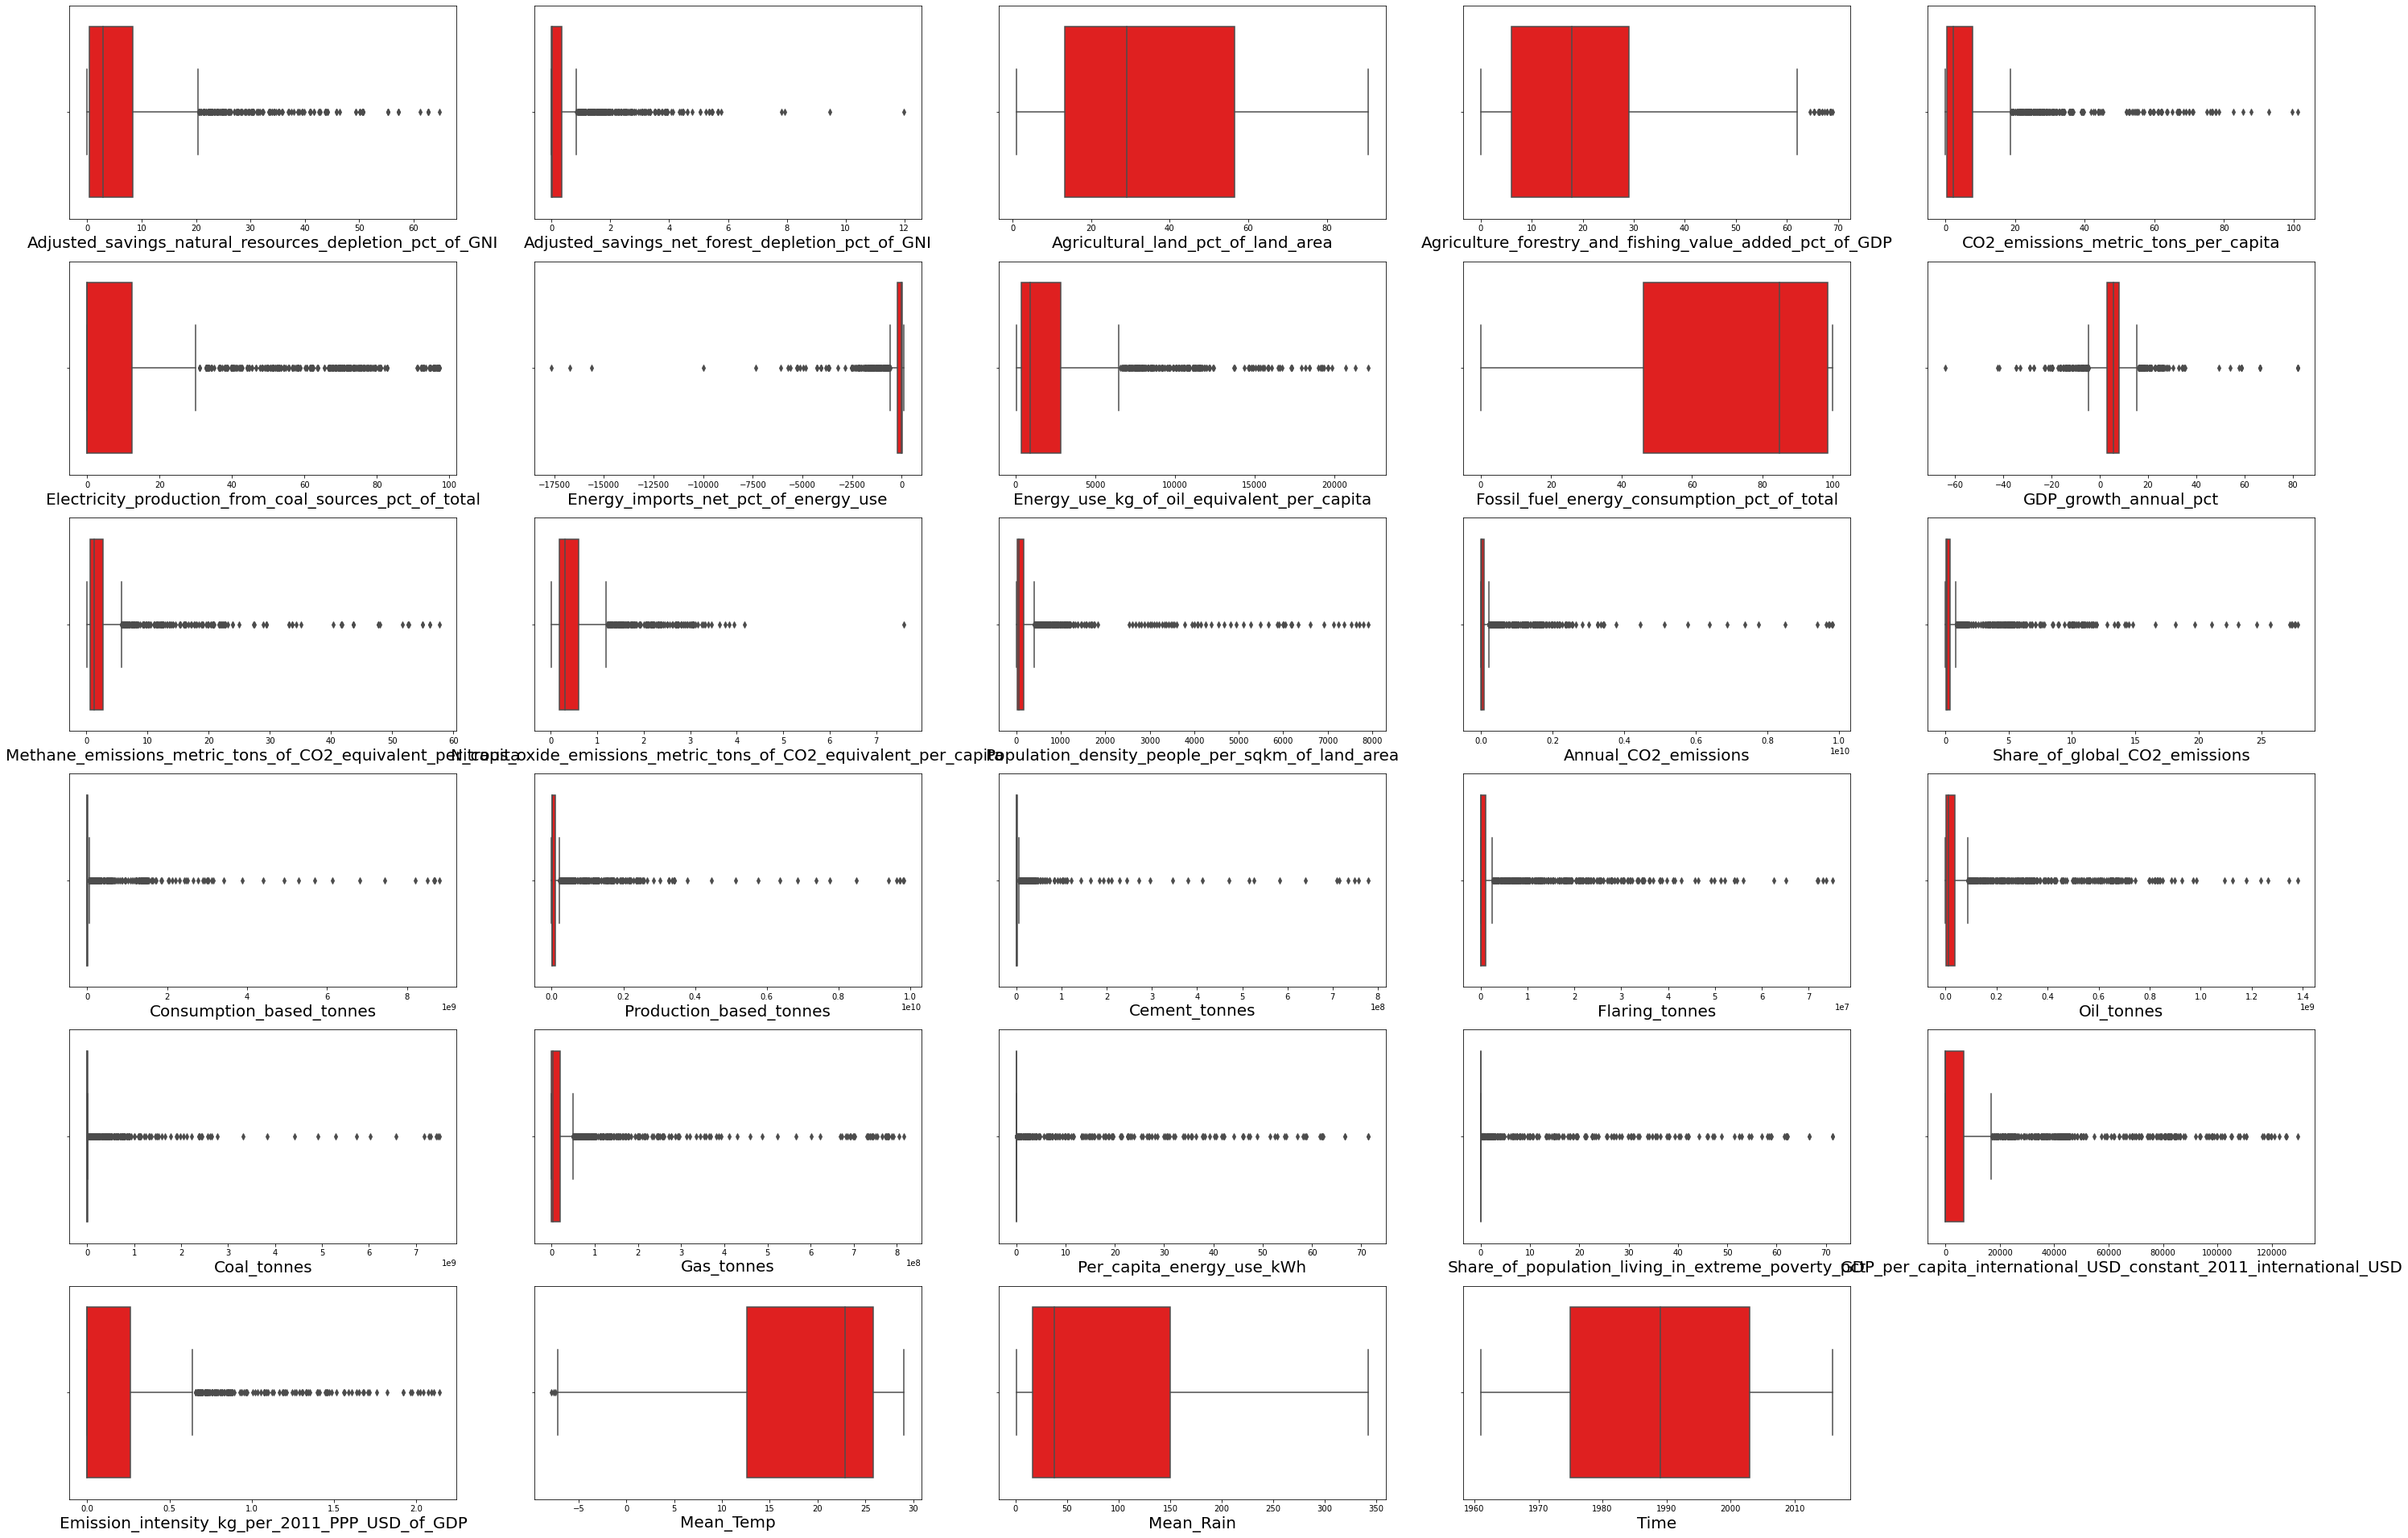

In [34]:
# Boxplots of numerical features before outlier treatment

plt.figure(figsize=(50,40))
for i in enumerate(ai_n.columns):
    plt.subplot(7,5,i[0]+1)
    sns.boxplot(ai_n[i[1]],color='r')
    plt.xlabel(i[1], fontsize=20)

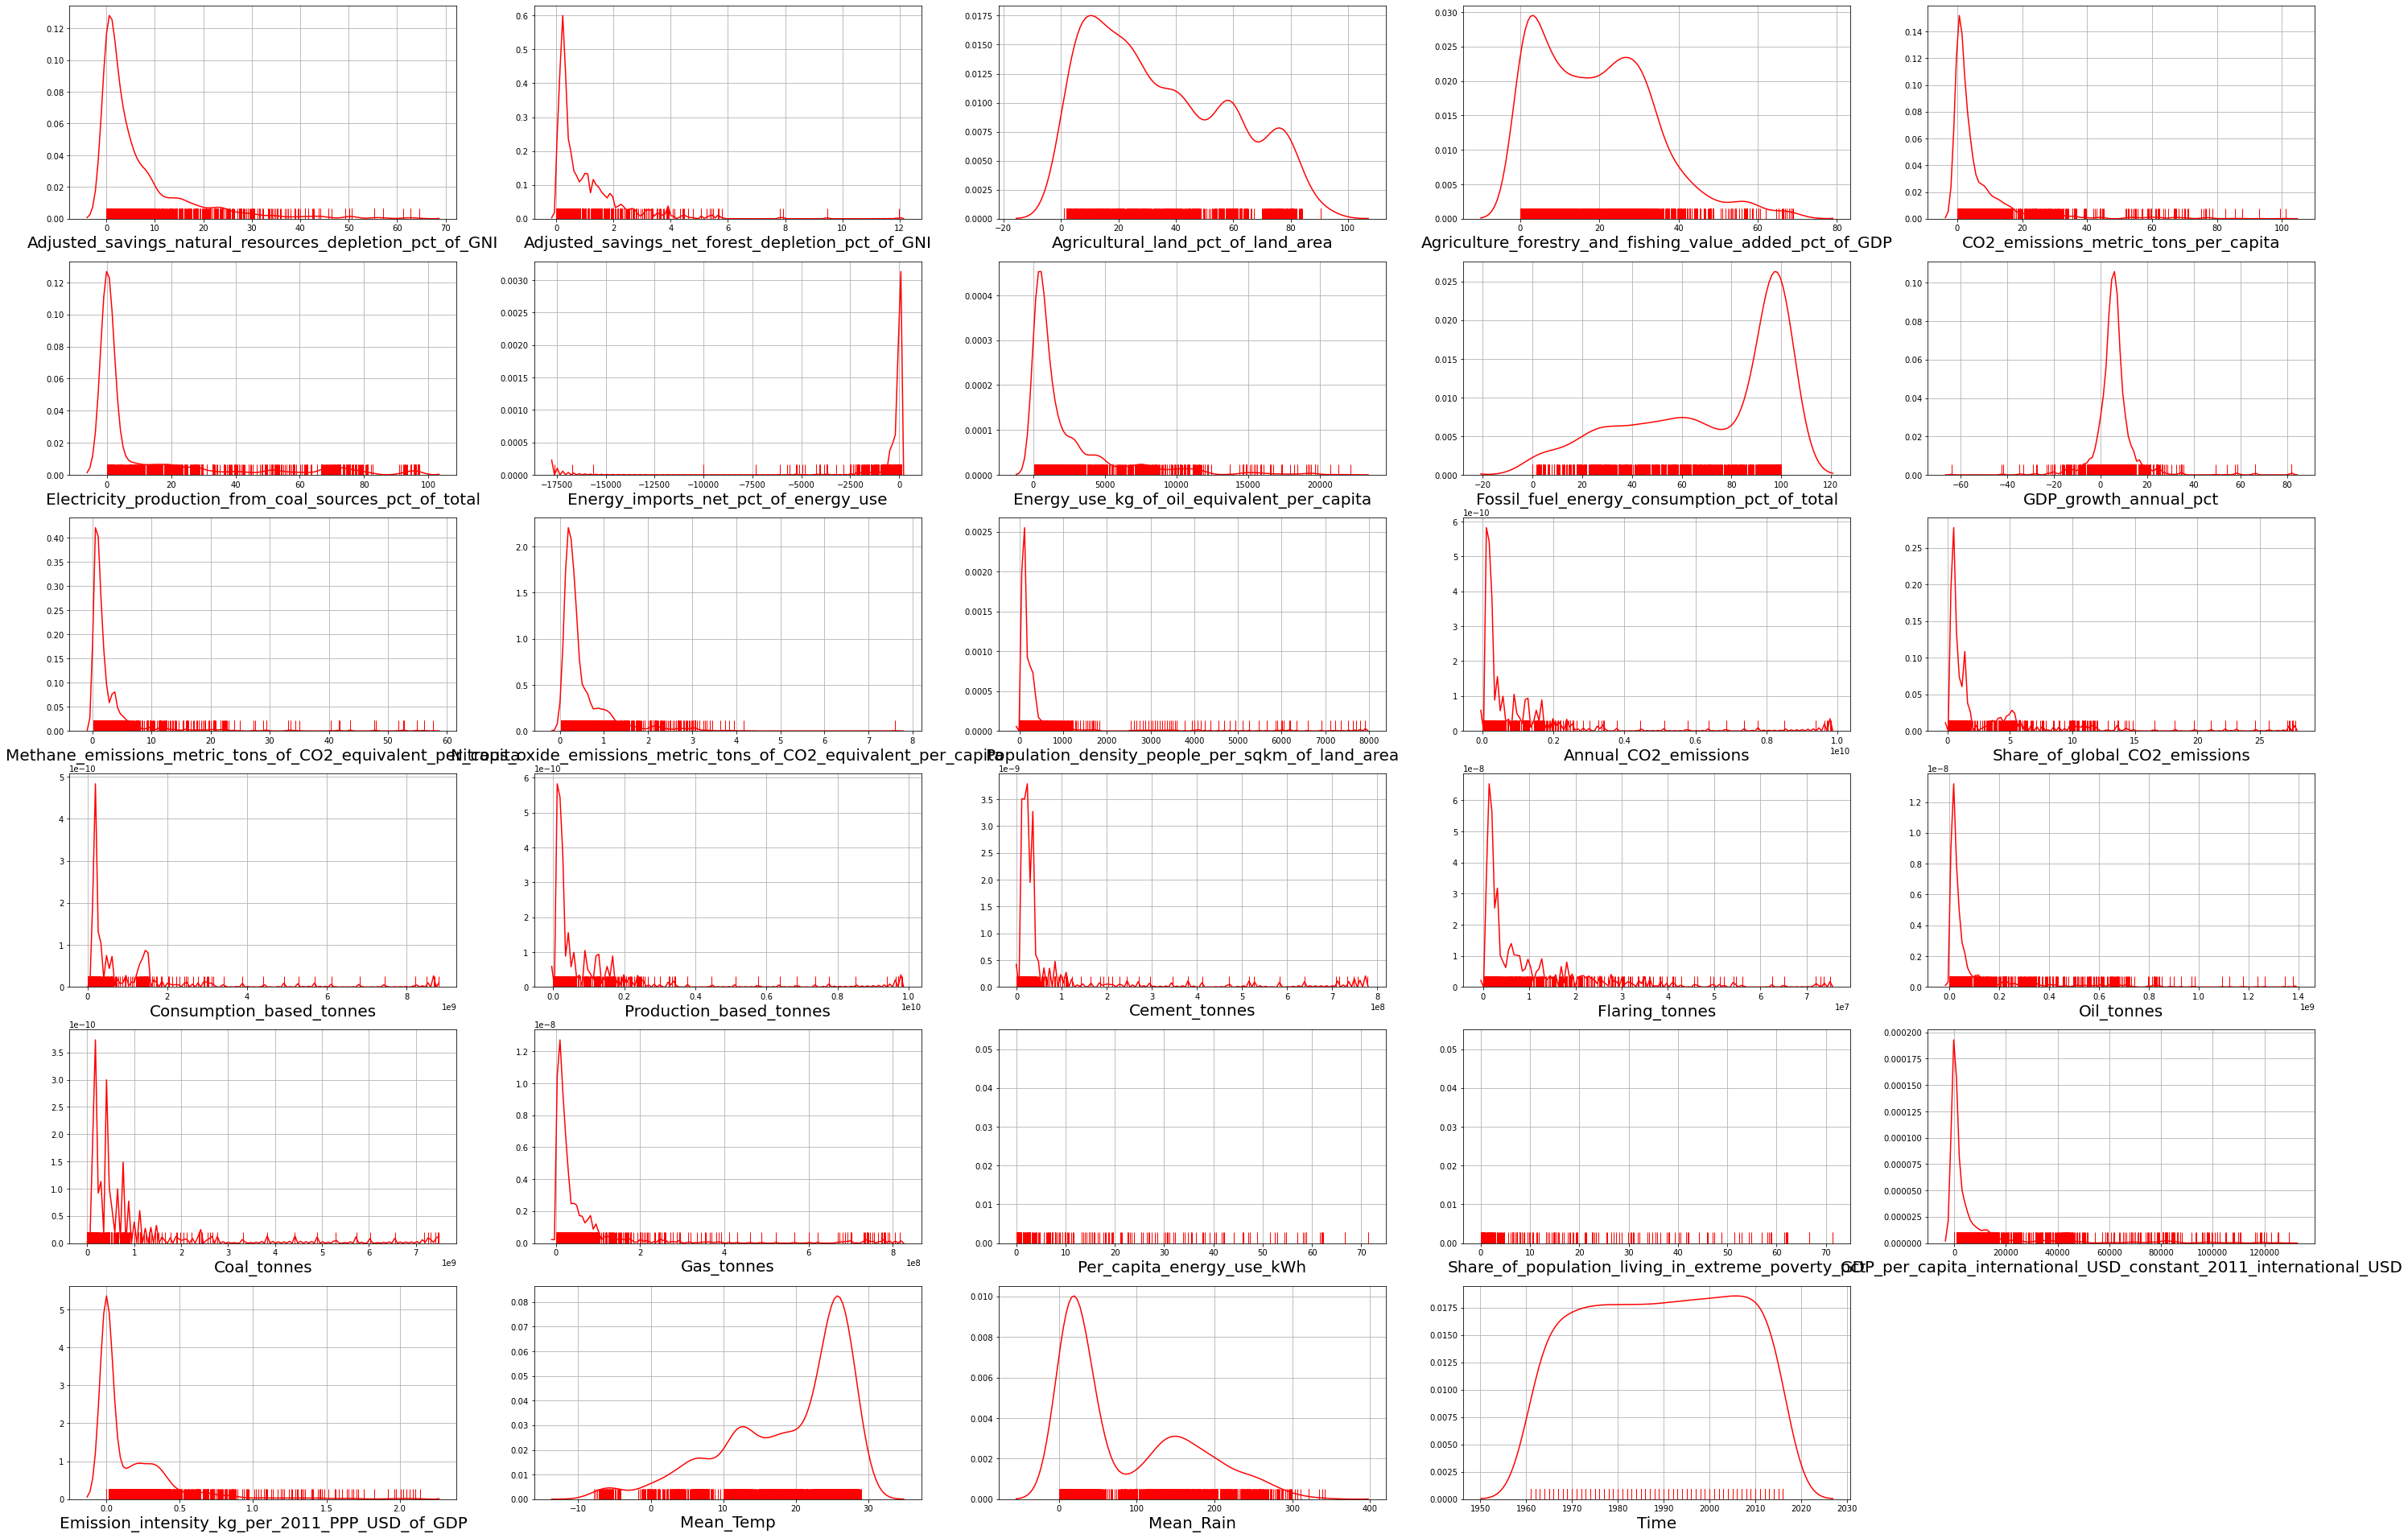

In [35]:
# Distribution of numerical features before outlier treatment with Power Transformer

plt.figure(figsize=(50,40))
for i in enumerate(ai_n.columns):
    plt.subplot(7,5,i[0]+1)
    sns.distplot(ai_n[i[1]],color='r',hist=False, rug=True)
    plt.xlabel(i[1], fontsize=20)
    plt.grid()

In [36]:
# Outliers treatment

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
ai_n1 = ai_n.drop(['Time'],axis=1)
ai_n_scaled = pd.DataFrame(pt.fit_transform(ai_n1), columns=ai_n1.columns)
ai_n_new = pd.concat([ai_n_scaled, ai_n['Time']], axis=1)

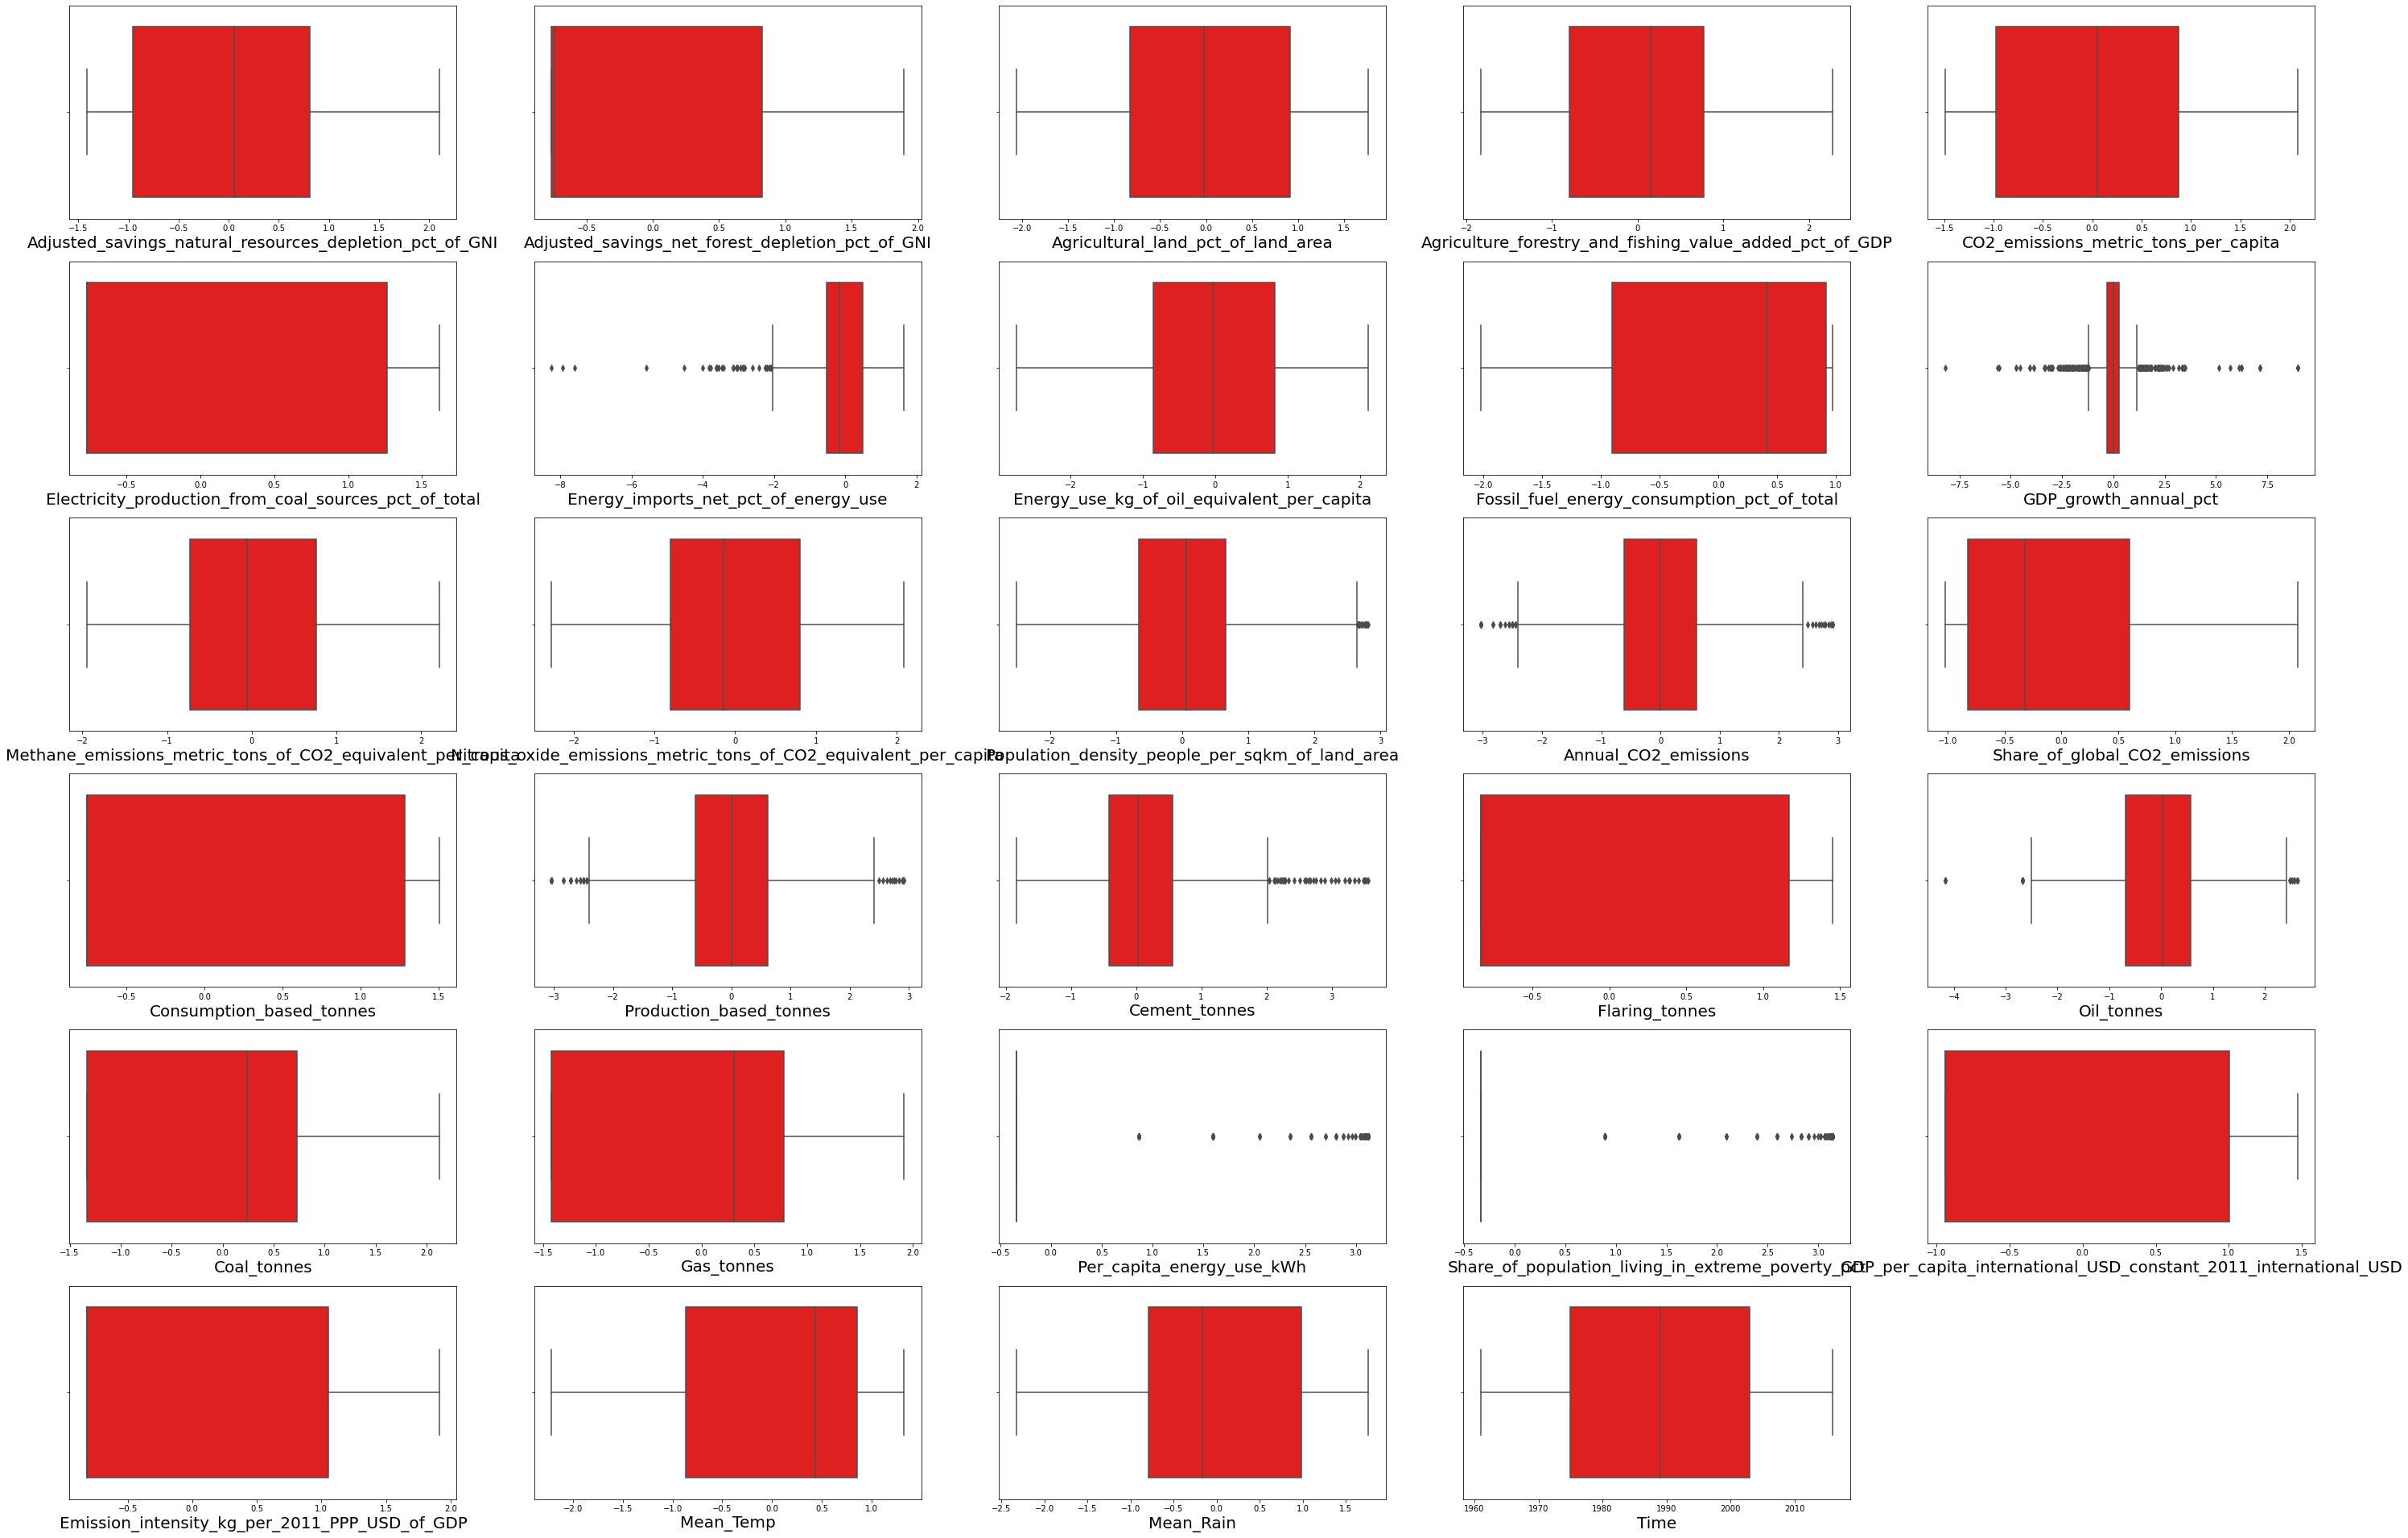

In [37]:
# Boxplots of numerical features after outlier treatment

plt.figure(figsize=(50,40))
for i in enumerate(ai_n_new.columns):
    plt.subplot(7,5,i[0]+1)
    sns.boxplot(ai_n_new[i[1]],color='r')
    plt.xlabel(i[1], fontsize=20)